# Customer Segmentation Using RFM Analysis
A notebook by Mobolaji Salawu

## Introduction
Customer segmentation is the process of grouping customers into specific groups based on shared characteristics and/or behaviors. The goal is to ensure that companies can easily tailor marketing, service, and sales efforts to the needs of each group.

**RFM analysis** is an effective customer segmentation method that is used to rank and segment customers based on their past purchase behavior and value over a time period. It is anchored on three core dimensions of customer behavior (and this is where the ‘RFM” acronym is derived from):
* Recency - how recently a customer made a purchase
* Frequency -  often has the same customer made purchase over a specified period of tim
* Monetary Value - what is the total value of these purchases over the defined time periodod


## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Import the Customer Transaction Datasets

In [2]:
excel_file = pd.ExcelFile('Sales Data.xlsx')

In [3]:
# Check sheet names of the read Excel file
excel_file.sheet_names

['2019 Sales', '2018 Sales', 'Products', 'Locations', 'Customers']

In [4]:
#Parse 2018 sales
sales_2018 = excel_file.parse('2018 Sales')
sales_2018.head()

,Order ID,Product ID,Location ID,Customer ID,Purchase Date,Quantity,Price
0,AX10001,ENX2071,A152,C1499,2018-11-23,1,136
1,AX10002,ENX2053,A139,C1359,2018-11-13,1,596
2,AX10005,ENX2030,A121,C1220,2018-05-21,1,1899
3,AX10007,ENX2001,A122,C1368,2018-12-19,4,951
4,AX10009,ENX2082,A101,C1764,2018-07-03,1,1103


In [5]:
sales_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4980 entries, 0 to 4979
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       4980 non-null   object        
 1   Product ID     4980 non-null   object        
 2   Location ID    4980 non-null   object        
 3   Customer ID    4980 non-null   object        
 4   Purchase Date  4980 non-null   datetime64[ns]
 5   Quantity       4980 non-null   int64         
 6   Price          4980 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 272.5+ KB


In [6]:
#Parse 2019 sales
sales_2019 = excel_file.parse('2019 Sales')
sales_2019.head()

,Order ID,Product ID,Location ID,Customer ID,Purchase Date,Quantity,Price
0,AX10008,ENX2076,A157,C1121,2019-02-27,2,1522
1,AX10013,ENX2087,A160,C1461,2019-04-17,1,1022
2,AX10015,ENX2037,A103,C1510,2019-09-20,2,880
3,AX10016,ENX2097,A130,C1133,2019-05-20,1,1052
4,AX10018,ENX2005,A158,C1240,2019-03-31,1,684


In [7]:
sales_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       4909 non-null   object        
 1   Product ID     4909 non-null   object        
 2   Location ID    4909 non-null   object        
 3   Customer ID    4909 non-null   object        
 4   Purchase Date  4909 non-null   datetime64[ns]
 5   Quantity       4909 non-null   int64         
 6   Price          4909 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 268.6+ KB


## 3. Data Cleaning and Transformation

In [8]:
# Define a function to check if the parsed dataframes have the same column names
def check_columnnames(df1, df2):
    first = list(df1.columns)
    second = list(df2.columns)
    if len(first) != len(second):
        print("The sales dfs do not have the same number of columns")
    else:
        for a in range(len(first)):
            if first[a] == second[a]:
                print(f"{first[a]} in the first dataframe is the same as {second[a]} in the 2nd dataframe")
            else:
                print(f"{first[a]} in the first dataframe is NOT the same as {second[a]} in the 2nd dataframe")

In [9]:
check_columnnames(sales_2018, sales_2019)

Order ID in the first dataframe is the same as Order ID in the 2nd dataframe
Product ID in the first dataframe is the same as Product ID in the 2nd dataframe
Location ID in the first dataframe is the same as Location ID in the 2nd dataframe
Customer ID in the first dataframe is the same as Customer ID in the 2nd dataframe
Purchase Date in the first dataframe is the same as Purchase Date in the 2nd dataframe
Quantity in the first dataframe is the same as Quantity in the 2nd dataframe
Price in the first dataframe is the same as Price in the 2nd dataframe


In [10]:
# Define a function to check if the columns with the same name have the same data type for the parsed dataframe
def check_columndatatype(df1, df2):
    first = list(df1.dtypes)
    second = list(df2.dtypes)
    if len(first) != len(second):
        print("The sales dfs do not have the same number of columns")
    else:
        for a in range(len(first)):
            if first[a] == second[a]:
                print(f"{df1.columns[a]} {first[a]} type in the 1st dataframe is the same data type as {df2.columns[a]} {second[a]} type in the 2nd dataframe")
            else:
                print(f"{df1.columns[a]} {first[a]} type in the 1st dataframe is NOT the same data type as {df2.columns[a]} {second[a]} type in the 2nd dataframe")

In [11]:
check_columndatatype(sales_2018, sales_2019)

Order ID object type in the 1st dataframe is the same data type as Order ID object type in the 2nd dataframe
Product ID object type in the 1st dataframe is the same data type as Product ID object type in the 2nd dataframe
Location ID object type in the 1st dataframe is the same data type as Location ID object type in the 2nd dataframe
Customer ID object type in the 1st dataframe is the same data type as Customer ID object type in the 2nd dataframe
Purchase Date datetime64[ns] type in the 1st dataframe is the same data type as Purchase Date datetime64[ns] type in the 2nd dataframe
Quantity int64 type in the 1st dataframe is the same data type as Quantity int64 type in the 2nd dataframe
Price int64 type in the 1st dataframe is the same data type as Price int64 type in the 2nd dataframe


In [12]:
# Combine the three sales dataframes as the columns and data type are consistent across them
sales_df = pd.concat([sales_2018, sales_2019], axis = 0).reset_index()

# Check if the merging was correctly done
if len(sales_df) == len(sales_2018) + len(sales_2019):
    print("sales_df contains all the records in sales_2018, and sales_2019")
else:
    print("Something went wrong")

sales_df contains all the records in sales_2018, and sales_2019


In [13]:
print("1. The first five records \n", sales_df.head(), "\n")
print("2. The last five records \n", sales_df.tail())

1. The first five records 
    index Order ID Product ID Location ID Customer ID Purchase Date  Quantity  \
0      0  AX10001    ENX2071        A152       C1499    2018-11-23         1   
1      1  AX10002    ENX2053        A139       C1359    2018-11-13         1   
2      2  AX10005    ENX2030        A121       C1220    2018-05-21         1   
3      3  AX10007    ENX2001        A122       C1368    2018-12-19         4   
4      4  AX10009    ENX2082        A101       C1764    2018-07-03         1   

   Price  
0    136  
1    596  
2   1899  
3    951  
4   1103   

2. The last five records 
       index Order ID Product ID Location ID Customer ID Purchase Date  \
9884   4904  AX24991    ENX2083        A119       C1508    2019-12-09   
9885   4905  AX24992    ENX2100        A135       C1644    2019-03-08   
9886   4906  AX24994    ENX2024        A169       C1351    2019-10-30   
9887   4907  AX24997    ENX2040        A161       C1626    2019-03-14   
9888   4908  AX24999    ENX2055

In [14]:
# Remove the index column
sales_df.drop(['index'], axis = 'columns', inplace = True)
sales_df.head()

,Order ID,Product ID,Location ID,Customer ID,Purchase Date,Quantity,Price
0,AX10001,ENX2071,A152,C1499,2018-11-23,1,136
1,AX10002,ENX2053,A139,C1359,2018-11-13,1,596
2,AX10005,ENX2030,A121,C1220,2018-05-21,1,1899
3,AX10007,ENX2001,A122,C1368,2018-12-19,4,951
4,AX10009,ENX2082,A101,C1764,2018-07-03,1,1103


In [15]:
# Take a bird's eyeview of the merged sales df
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9889 entries, 0 to 9888
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9889 non-null   object        
 1   Product ID     9889 non-null   object        
 2   Location ID    9889 non-null   object        
 3   Customer ID    9889 non-null   object        
 4   Purchase Date  9889 non-null   datetime64[ns]
 5   Quantity       9889 non-null   int64         
 6   Price          9889 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 540.9+ KB


In [16]:
sales_df.describe()

,Purchase Date,Quantity,Price
count,9889,9889.000000,9889.000000
mean,2018-12-29 22:18:21.587622656,1.939327,1212.531095
min,2018-01-01 00:00:00,1.000000,35.000000
25%,2018-07-01 00:00:00,1.000000,561.000000
50%,2018-12-29 00:00:00,2.000000,1278.000000
75%,2019-06-28 00:00:00,3.000000,1798.000000
max,2019-12-31 00:00:00,4.000000,2497.000000
std,NaN,1.084496,704.145360


In [17]:
# Crosscheck if there is any null value
sales_df.isnull().sum()

Order ID         0
Product ID       0
Location ID      0
Customer ID      0
Purchase Date    0
Quantity         0
Price            0
dtype: int64

In [18]:
# Add more attributes that will further aid the analysis of the sales data
sheets = excel_file.sheet_names
sheets

['2019 Sales', '2018 Sales', 'Products', 'Locations', 'Customers']

In [19]:
#Parse Products, Locations and Customers
needed_sheets = sheets[2:]
df_names = sheets[2:]
print(needed_sheets)
print(df_names)

['Products', 'Locations', 'Customers']
['Products', 'Locations', 'Customers']


In [20]:
for i,j in zip(needed_sheets, range(len(df_names))):
    df_names[j] = excel_file.parse(i)
    products = df_names[0]
    locations = df_names[1]
    customers = df_names[2]

In [21]:
# Check the parsed excel sheets
print("1a. The first five records in products \n", products.head(), "\n")
print("1b. The last five records in products \n", products.tail())

1a. The first five records in products 
   Product ID Product Name  Cost  Price
0    ENX2000    Product 1  1367   2241
1    ENX2001    Product 2   504    951
2    ENX2002    Product 3   534    847
3    ENX2003    Product 4  1516   1783
4    ENX2004    Product 5   665   1278 

1b. The last five records in products 
     Product ID Product Name  Cost  Price
96     ENX2096   Product 97  1301   1587
97     ENX2097   Product 98   589   1052
98     ENX2098   Product 99   683   1178
99     ENX2099  Product 100   984   1367
100    ENX2100  Product 101   455    799


In [22]:
print("2a. The first five records in locations \n", locations.head(), "\n")
print("2b. The last five records in locations \n", locations.tail())

2a. The first five records in locations 
   Location ID         Name               County State Code       State  Type  \
0        A100      Anaheim        Orange County         CA  California  City   
1        A101      Antioch  Contra Costa County         CA  California  City   
2        A102  Bakersfield          Kern County         CA  California  City   
3        A103     Berkeley       Alameda County         CA  California  City   
4        A104      Burbank   Los Angeles County         CA  California  City   

   Latitude  Longitude  Area Code  Population  Households  Median Income  \
0  33.83529 -117.91450        657      350742       99670          60752   
1  38.00492 -121.80579        925      110542       33718          64329   
2  35.37329 -119.01871        661      373640      112439          57095   
3  37.87159 -122.27275        510      120972       45917          66237   
4  34.18084 -118.30897        818      105319       41361          66076   

   Land Area  Water 

In [23]:
print("3a. The first five records in customers \n", customers.head(), "\n")
print("3b. The last five records in customers \n", customers.tail())

3a. The first five records in customers 
   Customer ID    Customer Name
0       C1000      Jesse Evans
1       C1001     Victor Ramos
2       C1002  Mark Montgomery
3       C1003    Dennis Morris
4       C1004  Gregory Simmons 

3b. The last five records in customers 
     Customer ID  Customer Name
796       C1796   Patrick Hall
797       C1797     Billy West
798       C1798      Joe Baker
799       C1799  Eugene Cooper
800       C1800  Frank Hawkins


In [24]:
# Add Total Amount column to sales_df
sales_df['Total Amount'] = sales_df.Quantity * sales_df.Price
sales_df.head()

,Order ID,Product ID,Location ID,Customer ID,Purchase Date,Quantity,Price,Total Amount
0,AX10001,ENX2071,A152,C1499,2018-11-23,1,136,136
1,AX10002,ENX2053,A139,C1359,2018-11-13,1,596,596
2,AX10005,ENX2030,A121,C1220,2018-05-21,1,1899,1899
3,AX10007,ENX2001,A122,C1368,2018-12-19,4,951,3804
4,AX10009,ENX2082,A101,C1764,2018-07-03,1,1103,1103


In [25]:
# Add Product Name and Cost columns to sales_df from products
sales_df = sales_df.join(products[['Product ID', 'Product Name', 'Cost']].set_index('Product ID'), on='Product ID')

In [26]:
sales_df.head()

,Order ID,Product ID,Location ID,Customer ID,Purchase Date,Quantity,Price,Total Amount,Product Name,Cost
0,AX10001,ENX2071,A152,C1499,2018-11-23,1,136,136,Product 72,72
1,AX10002,ENX2053,A139,C1359,2018-11-13,1,596,596,Product 54,358
2,AX10005,ENX2030,A121,C1220,2018-05-21,1,1899,1899,Product 31,1044
3,AX10007,ENX2001,A122,C1368,2018-12-19,4,951,3804,Product 2,504
4,AX10009,ENX2082,A101,C1764,2018-07-03,1,1103,1103,Product 83,838


In [27]:
# Change Name to City in location df
locations.rename(columns = {'Name': 'City'}, inplace = True)
locations.columns

Index(['Location ID', 'City', 'County', 'State Code', 'State', 'Type',
       'Latitude', 'Longitude', 'Area Code', 'Population', 'Households',
       'Median Income', 'Land Area', 'Water Area', 'Time Zone'],
      dtype='object')

In [28]:
# Add Location Name and County columns to sales_df from locations
sales_df = sales_df.join(locations[['Location ID', 'City', 'County', 'State']].set_index('Location ID'), on = 'Location ID')

In [29]:
sales_df.tail()

,Order ID,Product ID,Location ID,Customer ID,Purchase Date,Quantity,Price,Total Amount,Product Name,Cost,City,County,State
9884,AX24991,ENX2083,A119,C1508,2019-12-09,3,2141,6423,Product 84,1777,Fontana,San Bernardino County,California
9885,AX24992,ENX2100,A135,C1644,2019-03-08,4,799,3196,Product 101,455,Murrieta,Riverside County,California
9886,AX24994,ENX2024,A169,C1351,2019-10-30,1,356,356,Product 25,292,Vallejo,Solano County,California
9887,AX24997,ENX2040,A161,C1626,2019-03-14,1,1889,1889,Product 41,945,Santa Maria,Santa Barbara County,California
9888,AX24999,ENX2055,A114,C1351,2019-11-07,2,2495,4990,Product 56,1896,El Cajon,San Diego County,California


In [30]:
# Create Total Cost column
sales_df['Total Cost'] = sales_df.Quantity * sales_df.Cost

In [31]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9889 entries, 0 to 9888
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9889 non-null   object        
 1   Product ID     9889 non-null   object        
 2   Location ID    9889 non-null   object        
 3   Customer ID    9889 non-null   object        
 4   Purchase Date  9889 non-null   datetime64[ns]
 5   Quantity       9889 non-null   int64         
 6   Price          9889 non-null   int64         
 7   Total Amount   9889 non-null   int64         
 8   Product Name   9889 non-null   object        
 9   Cost           9889 non-null   int64         
 10  City           9889 non-null   object        
 11  County         9889 non-null   object        
 12  State          9889 non-null   object        
 13  Total Cost     9889 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 1.1+ MB


## 4. Exploratory Data Analysis

### More Understanding of the Data

In [32]:
# Check if there are null values introduced during the data wrangling stage
sales_df.isnull().sum()

Order ID         0
Product ID       0
Location ID      0
Customer ID      0
Purchase Date    0
Quantity         0
Price            0
Total Amount     0
Product Name     0
Cost             0
City             0
County           0
State            0
Total Cost       0
dtype: int64

In [33]:
# Quick review of the numeric attributes
sales_df.describe()

,Purchase Date,Quantity,Price,Total Amount,Cost,Total Cost
count,9889,9889.000000,9889.000000,9889.000000,9889.000000,9889.000000
mean,2018-12-29 22:18:21.587622656,1.939327,1212.531095,2351.735059,817.707857,1587.038427
min,2018-01-01 00:00:00,1.000000,35.000000,35.000000,22.000000,22.000000
25%,2018-07-01 00:00:00,1.000000,561.000000,868.000000,409.000000,562.000000
50%,2018-12-29 00:00:00,2.000000,1278.000000,1742.000000,786.000000,1190.000000
75%,2019-06-28 00:00:00,3.000000,1798.000000,3196.000000,1234.000000,2049.000000
max,2019-12-31 00:00:00,4.000000,2497.000000,9988.000000,1965.000000,7860.000000
std,NaN,1.084496,704.145360,2053.420971,489.891423,1414.221681


In [34]:
# Quick review of the non-numeric attributes - Product Name, Location Name, County, and State

In [35]:
nonnumericcols = ['Product Name', 'City', 'County', 'State']
sales_df[nonnumericcols].nunique()

Product Name    101
City             74
County           22
State             1
dtype: int64

In [36]:
# Quick check of the Product Name calumn
sales_df['Product Name'].value_counts()

Product Name
Product 24    135
Product 55    120
Product 68    120
Product 43    116
Product 41    115
             ... 
Product 81     79
Product 76     79
Product 51     78
Product 85     76
Product 80     76
Name: count, Length: 101, dtype: int64

In [37]:
#Check to ensure valid product names
sales_df['Product Name'].unique()

array(['Product 72', 'Product 54', 'Product 31', 'Product 2',
       'Product 83', 'Product 5', 'Product 89', 'Product 78', 'Product 6',
       'Product 60', 'Product 48', 'Product 100', 'Product 99',
       'Product 69', 'Product 59', 'Product 11', 'Product 96',
       'Product 66', 'Product 44', 'Product 10', 'Product 57',
       'Product 93', 'Product 3', 'Product 51', 'Product 36',
       'Product 41', 'Product 28', 'Product 37', 'Product 16',
       'Product 26', 'Product 61', 'Product 22', 'Product 1',
       'Product 55', 'Product 84', 'Product 20', 'Product 47',
       'Product 50', 'Product 94', 'Product 76', 'Product 33',
       'Product 80', 'Product 49', 'Product 34', 'Product 42',
       'Product 98', 'Product 35', 'Product 71', 'Product 43',
       'Product 52', 'Product 90', 'Product 38', 'Product 23',
       'Product 17', 'Product 21', 'Product 7', 'Product 39',
       'Product 18', 'Product 73', 'Product 19', 'Product 40',
       'Product 29', 'Product 67', 'Product 81

In [38]:
sales_df['Product Name'].nunique()

101

In [39]:
# Quick check of the City calumn to ensure valid names
sales_df['City'].unique()

array(['San Bernardino', 'Ontario', 'Fresno', 'Fullerton', 'Antioch',
       'San Jose', 'Simi Valley', 'Visalia', 'Stockton', 'Burbank',
       'Victorville', 'Berkeley', 'Pasadena', 'Fontana', 'Fremont',
       'Santa Maria', 'Vista', 'El Monte', 'Salinas', 'Sacramento',
       'Clovis', 'Jurupa Valley', 'Downey', 'Lancaster', 'Rialto',
       'East Los Angeles', 'Carlsbad', 'Irvine', 'Torrance', 'Long Beach',
       'Thousand Oaks', 'Orange', 'Oakland', 'Huntington Beach',
       'Inglewood', 'Murrieta', 'Moreno Valley', 'San Francisco',
       'Anaheim', 'Daly City', 'Chula Vista', 'Fairfield', 'Escondido',
       'Hayward', 'Glendale', 'Rancho Cucamonga',
       'San Buenaventura (Ventura)', 'Santa Clarita', 'El Cajon',
       'Santa Ana', 'Concord', 'Temecula', 'Vallejo', 'Richmond',
       'Los Angeles', 'Norwalk', 'Costa Mesa', 'Oxnard', 'Oceanside',
       'Corona', 'Santa Rosa', 'Garden Grove', 'Modesto', 'Sunnyvale',
       'San Diego', 'Santa Clara', 'Pomona', 'Palmdale', '

In [40]:
sales_df['City'].value_counts()

City
Roseville        161
Escondido        158
El Monte         158
Hayward          152
Rialto           152
                ... 
Murrieta         115
San Francisco    113
Garden Grove     112
Costa Mesa       109
Fresno           103
Name: count, Length: 74, dtype: int64

In [41]:
sales_df['City'].nunique()

74

In [42]:
# Quick check of the County calumn to ensure valid names
sales_df.County.unique()

array(['San Bernardino County', 'Fresno County', 'Orange County',
       'Contra Costa County', 'Santa Clara County', 'Ventura County',
       'Tulare County', 'San Joaquin County', 'Los Angeles County',
       'Alameda County', 'Santa Barbara County', 'San Diego County',
       'Monterey County', 'Sacramento County', 'Riverside County',
       'San Francisco County', 'San Mateo County', 'Solano County',
       'Sonoma County', 'Stanislaus County', 'Kern County',
       'Placer County'], dtype=object)

In [43]:
sales_df.County.nunique()

22

In [44]:
county = pd.DataFrame({'count': sales_df.County.value_counts(), '% count': round((sales_df.County.value_counts()/len(sales_df.County))*100,2)})
county

,count,% count
County,,
Los Angeles County,2194,22.19
Orange County,1013,10.24
San Diego County,956,9.67
San Bernardino County,852,8.62
Riverside County,791,8.00
Alameda County,556,5.62
Ventura County,522,5.28
Santa Clara County,391,3.95
Contra Costa County,384,3.88


In [45]:
# Only transaction data of customers from California is included in the dataset
print(sales_df['State'].unique(), sales_df['State'].nunique())

['California'] 1


### Distribution of Values in Numeric Columns

In [46]:
# A reminder on how the sales_df dataframe looks like
sales_df.head()

,Order ID,Product ID,Location ID,Customer ID,Purchase Date,Quantity,Price,Total Amount,Product Name,Cost,City,County,State,Total Cost
0,AX10001,ENX2071,A152,C1499,2018-11-23,1,136,136,Product 72,72,San Bernardino,San Bernardino County,California,72
1,AX10002,ENX2053,A139,C1359,2018-11-13,1,596,596,Product 54,358,Ontario,San Bernardino County,California,358
2,AX10005,ENX2030,A121,C1220,2018-05-21,1,1899,1899,Product 31,1044,Fresno,Fresno County,California,1044
3,AX10007,ENX2001,A122,C1368,2018-12-19,4,951,3804,Product 2,504,Fullerton,Orange County,California,2016
4,AX10009,ENX2082,A101,C1764,2018-07-03,1,1103,1103,Product 83,838,Antioch,Contra Costa County,California,838


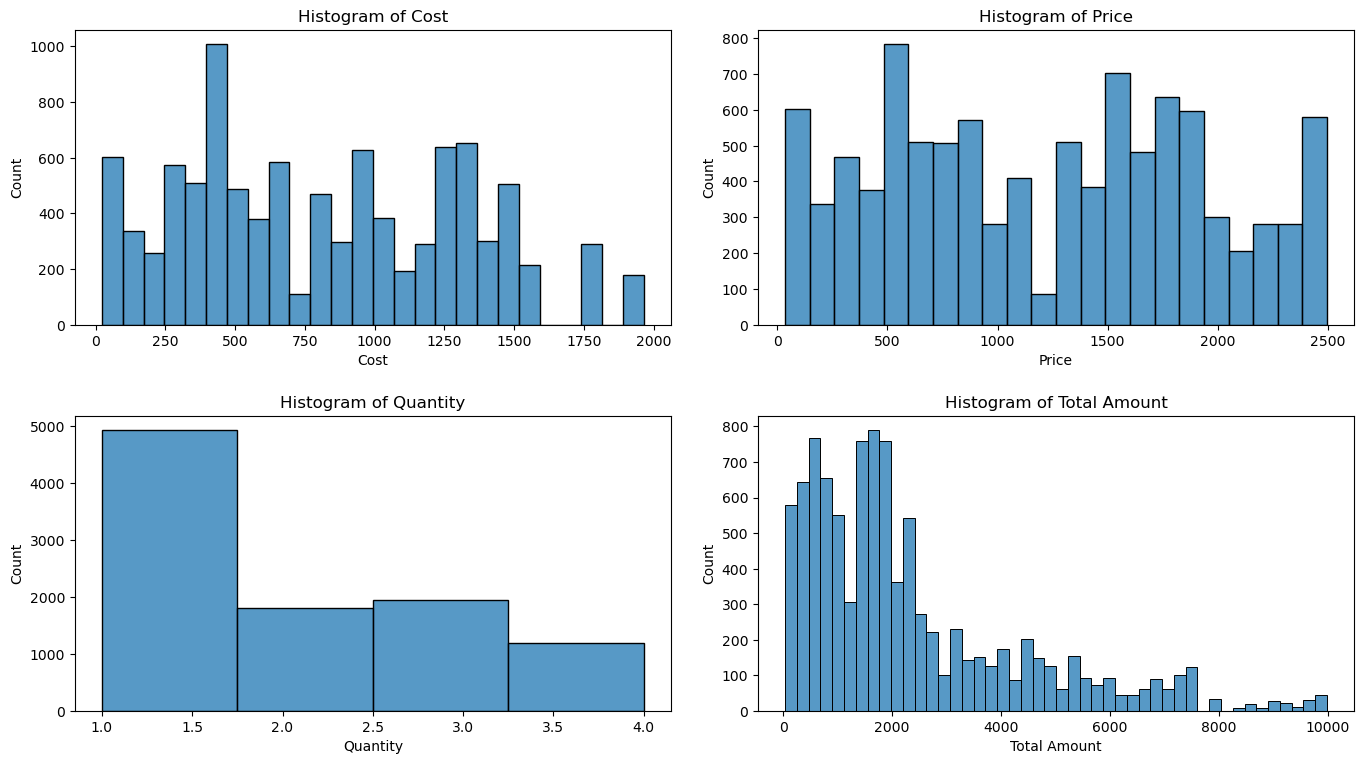

In [47]:
# View the distribution of values in Cost, Price, Quantity and Total Amount columns
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes[0, 0].set_title('Histogram of Cost')
sns.histplot(data=sales_df, x='Cost', ax=axes[0, 0])
axes[0, 1].set_title('Histogram of Price')
sns.histplot(data=sales_df, x='Price', ax=axes[0, 1])
axes[1, 0].set_title('Histogram of Quantity')
sns.histplot(data=sales_df, x='Quantity', bins=4, ax=axes[1, 0])
axes[1, 1].set_title('Histogram of Total Amount')
sns.histplot(data=sales_df, x='Total Amount', ax=axes[1, 1])

plt.tight_layout(pad=2)
plt.show()

### Top and Least Performing Products, Cities and Counties

In [48]:
# Check the top 5 and bottom 5 products by amount and quantity
product_amt = sales_df[['Product Name', 'Total Amount']].groupby('Product Name').sum().sort_values('Total Amount', ascending = False)
product_qty = sales_df[['Product Name', 'Quantity']].groupby('Product Name').sum().sort_values('Quantity', ascending = False)

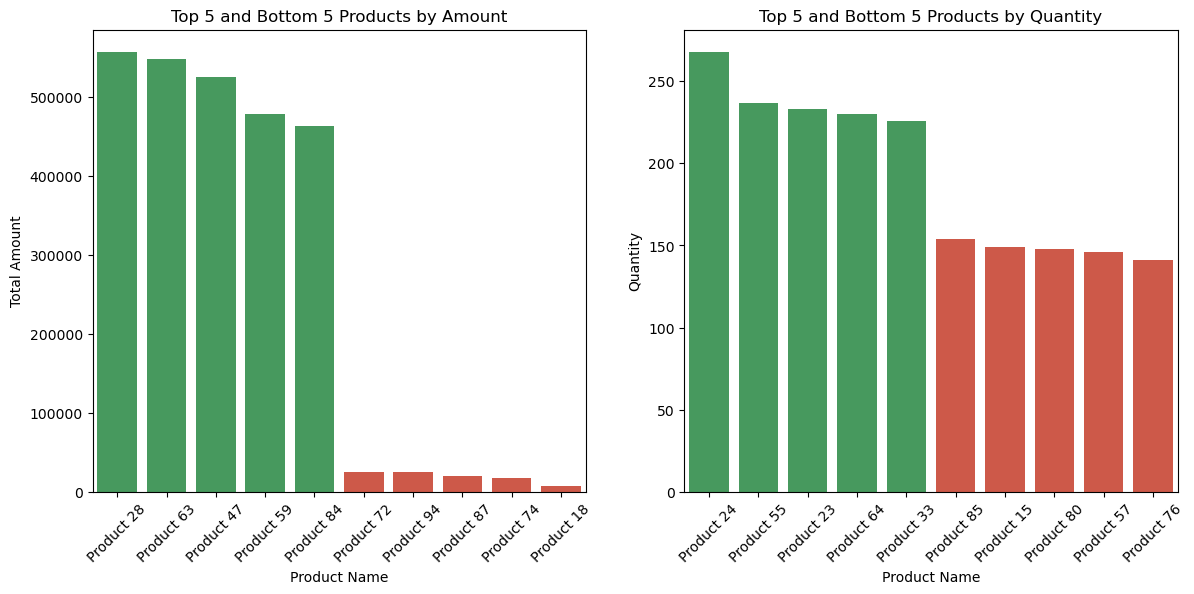

In [49]:
# Create the visual
req = [0, 1, 2, 3, 4, -5, -4, -3, -2, -1]
cols1 = ['#e34933' if x < product_amt['Total Amount'].mean() else '#39a758' for x in product_amt.iloc[req]['Total Amount']]
cols2 = ['#e34933' if x < product_qty['Quantity'].mean() else '#39a758' for x in product_qty.iloc[req]['Quantity']]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax1.set_title('Top 5 and Bottom 5 Products by Amount')
sns.barplot(data=product_amt.iloc[req], x='Product Name', y='Total Amount', hue='Product Name', palette=cols1, ax=ax1)
ax2.set_title('Top 5 and Bottom 5 Products by Quantity')
sns.barplot(data=product_qty.iloc[req], x='Product Name', y='Quantity', hue='Product Name', palette=cols2, ax=ax2)
ax1.tick_params('x', rotation=45)
ax2.tick_params('x', rotation=45)

plt.show()

In [50]:
# Check the top 5 and bottom 5 cities and counties by total amount and customer base
city_amt = sales_df[['City', 'Total Amount']].groupby('City').sum().sort_values('Total Amount', ascending = False)
city_cust = sales_df[['City', 'Customer ID']].groupby('City').nunique().sort_values('Customer ID', ascending = False)
county_amt = sales_df[['County', 'Total Amount']].groupby('County').sum().sort_values('Total Amount', ascending = False)
county_cust = sales_df[['County', 'Customer ID']].groupby('County').nunique().sort_values('Customer ID', ascending = False)

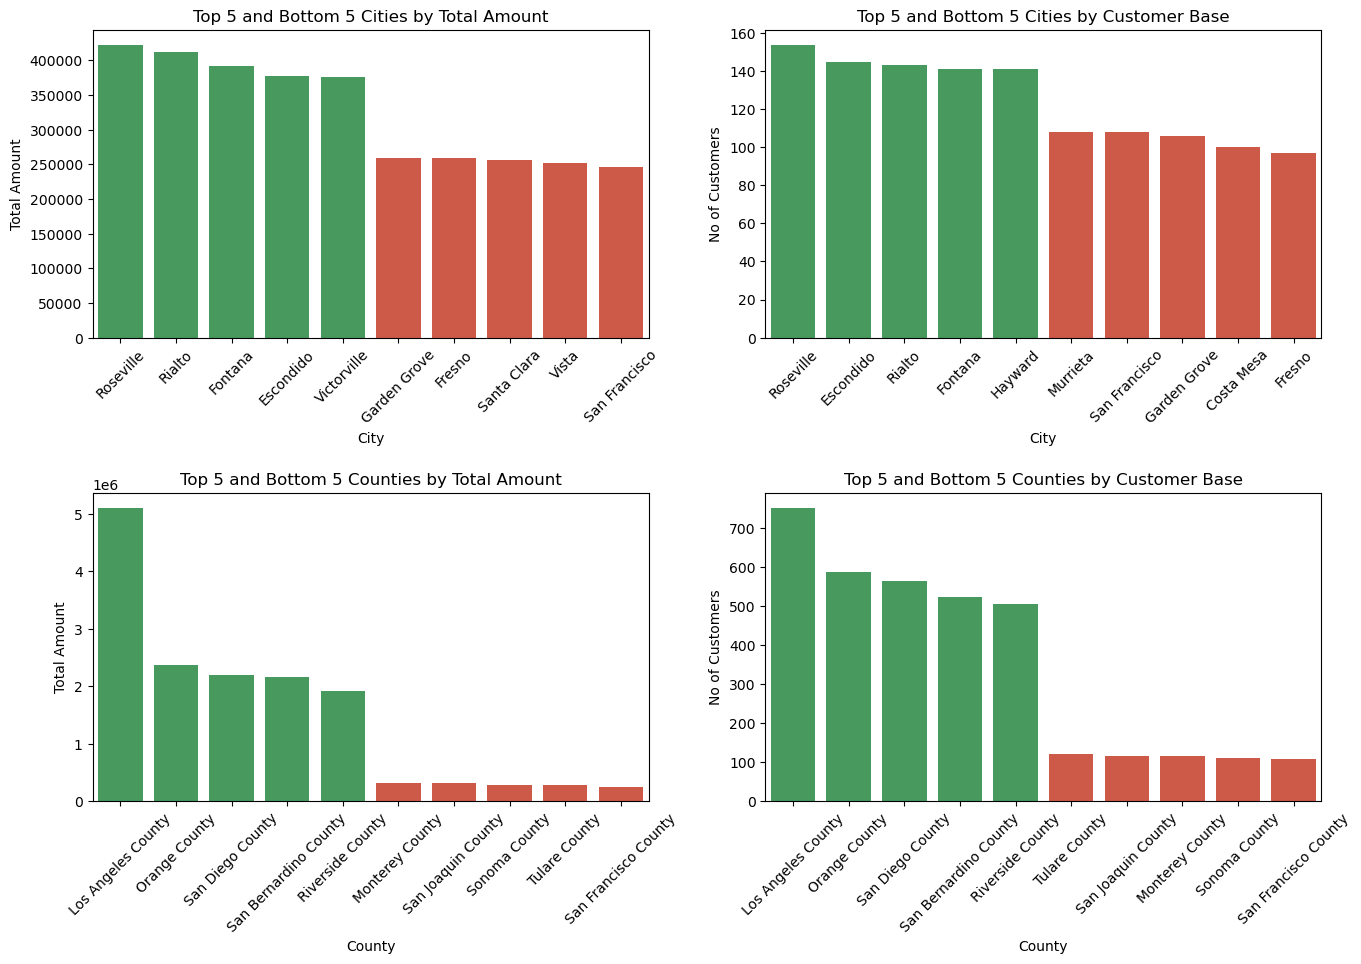

In [51]:
# Create the visual
req = [0, 1, 2, 3, 4, -5, -4, -3, -2, -1]
cols1 = ['#e34933' if x < city_amt['Total Amount'].mean() else '#39a758' for x in city_amt.iloc[req]['Total Amount']]
cols2 = ['#e34933' if x < city_cust['Customer ID'].mean() else '#39a758' for x in city_cust.iloc[req]['Customer ID']]
cols3 = ['#e34933' if x < county_amt['Total Amount'].mean() else '#39a758' for x in county_amt.iloc[req]['Total Amount']]
cols4 = ['#e34933' if x < county_cust['Customer ID'].mean() else '#39a758' for x in county_cust.iloc[req]['Customer ID']]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0].set_title('Top 5 and Bottom 5 Cities by Total Amount')
sns.barplot(data=city_amt.iloc[req], x='City', y='Total Amount', hue='City', palette=cols1, ax=axes[0, 0])
axes[0, 1].set(ylabel='No of Customers', title='Top 5 and Bottom 5 Cities by Customer Base')
sns.barplot(data=city_cust.iloc[req], x='City', y='Customer ID', hue='City', palette=cols2, ax=axes[0, 1])
axes[1, 0].set_title('Top 5 and Bottom 5 Counties by Total Amount')
sns.barplot(data=county_amt.iloc[req], x='County', y='Total Amount', hue='County', palette=cols3, ax=axes[1, 0])
axes[1, 1].set(ylabel='No of Customers', title='Top 5 and Bottom 5 Counties by Customer Base')
sns.barplot(data=county_cust.iloc[req], x='County', y='Customer ID', hue='County', palette=cols4, ax=axes[1, 1])
axes[0, 0].tick_params('x', rotation=45)
axes[0, 1].tick_params('x', rotation=45)
axes[1, 0].tick_params('x', rotation=45)
axes[1, 1].tick_params('x', rotation=45)

plt.tight_layout(pad=2)
plt.show()

## 5. RFM Analysis

In [52]:
# Choose a reference date; for the purpose of this analysis, the assumption is that the rfm analysis was done on January 31st, 2020
import datetime as dt
reference_date = dt.datetime(2020,1,31)
reference_date

datetime.datetime(2020, 1, 31, 0, 0)

In [53]:
# Ensure that the Purchase Date column is formatted as datetime
sales_df['Purchase Date'] = pd.to_datetime(sales_df['Purchase Date'])

In [54]:
sales_df.head(2)

,Order ID,Product ID,Location ID,Customer ID,Purchase Date,Quantity,Price,Total Amount,Product Name,Cost,City,County,State,Total Cost
0,AX10001,ENX2071,A152,C1499,2018-11-23,1,136,136,Product 72,72,San Bernardino,San Bernardino County,California,72
1,AX10002,ENX2053,A139,C1359,2018-11-13,1,596,596,Product 54,358,Ontario,San Bernardino County,California,358


In [55]:
# Derive the three core dimensions of RFM analysis
rfm = sales_df.groupby('Customer ID').agg({'Purchase Date': lambda date: (reference_date - date.max()).days,
                                           'Order ID': lambda num: len(num),
                                           'Total Amount': lambda amt: amt.sum()})

In [56]:
rfm.head()

,Purchase Date,Order ID,Total Amount
Customer ID,,,
C1000,119,10,19198
C1001,55,13,19658
C1002,168,15,32994
C1003,37,21,51573
C1004,36,13,28885


In [57]:
# Change the column names of rfm to Recency, Frequency, and Monetary (decided to use Monetary instead of Monetary Value in naming the column)
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
C1000,119,10,19198
C1001,55,13,19658
C1002,168,15,32994
C1003,37,21,51573
C1004,36,13,28885


In [58]:
# Quick overview of the rfm dataframe
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, C1000 to C1800
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    801 non-null    int64
 1   Frequency  801 non-null    int64
 2   Monetary   801 non-null    int64
dtypes: int64(3)
memory usage: 25.0+ KB


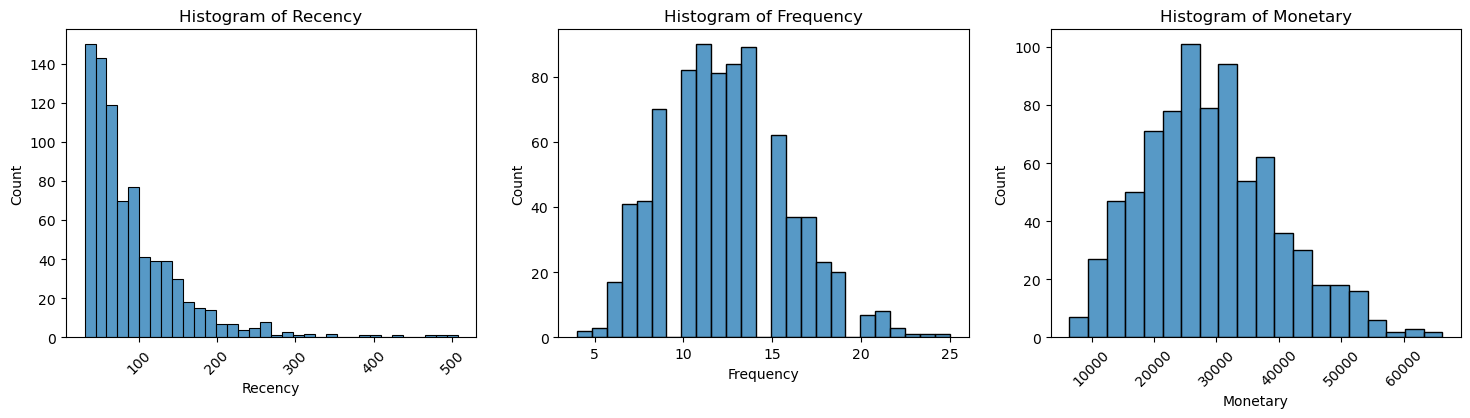

In [59]:
# Visualize the distribution of values for Recency, Frequency, and Monetary Value
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))
ax1.set_title('Histogram of Recency')
sns.histplot(data=rfm, x='Recency', ax=ax1)
ax2.set_title('Histogram of Frequency')
sns.histplot(data=rfm, x='Frequency', ax=ax2)
ax3.set_title('Histogram of Monetary')
sns.histplot(data=rfm, x='Monetary', ax=ax3)

ax1.tick_params('x', rotation=45)
ax3.tick_params('x', rotation=45)

plt.show()

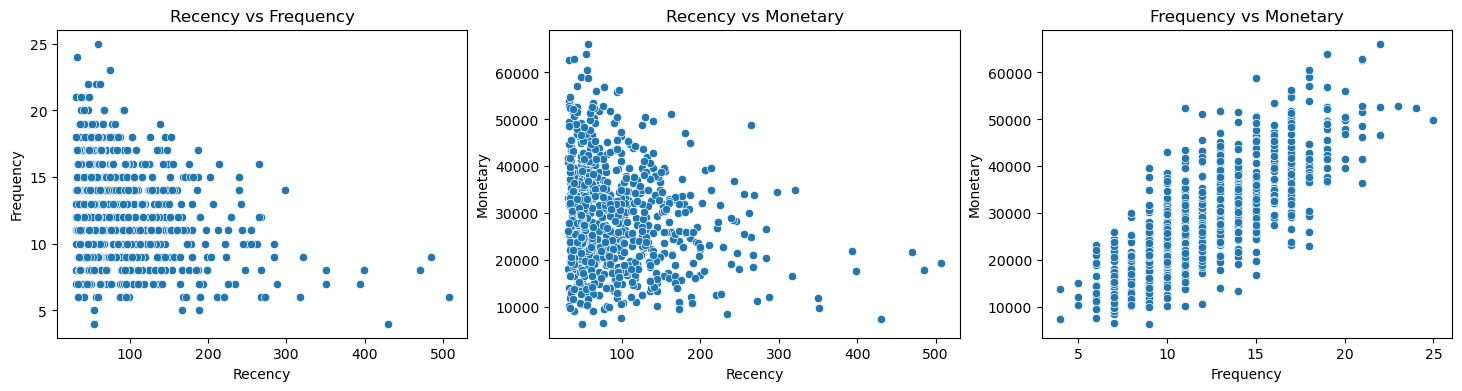

In [60]:
# Visualize the relationship between Recency, Frequency, and Monetary Value
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))
ax1.set_title('Recency vs Frequency')
sns.scatterplot(data=rfm, x='Recency', y='Frequency', ax=ax1)
ax2.set_title('Recency vs Monetary')
sns.scatterplot(data=rfm, x='Recency', y='Monetary', ax=ax2)
ax3.set_title('Frequency vs Monetary')
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', ax=ax3)

plt.show()

In [61]:
# Define scoring criteria for Recency, Frequency, and Monetary Value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent purchase)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency of purchase
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher total amount spent (monetary value)

In [62]:
# Calculate RFM scores
rfm['RecencyScore'] = pd.cut(rfm['Recency'], bins=5, labels=recency_scores)
rfm['FrequencyScore'] = pd.cut(rfm['Frequency'], bins=5, labels=frequency_scores)
rfm['MonetaryScore'] = pd.cut(rfm['Monetary'], bins=5, labels=monetary_scores)

rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
C1000,119,10,19198,5,2,2
C1001,55,13,19658,5,3,2
C1002,168,15,32994,4,3,3
C1003,37,21,51573,5,5,4
C1004,36,13,28885,5,3,2


In [63]:
# Create the RFM_Score column by combining RecencyScore, FrequencyScore, and MonetaryScore
rfm['RFM_Score'] = rfm.RecencyScore.astype(str) + rfm.FrequencyScore.astype(str) + rfm.MonetaryScore.astype(str)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
Customer ID,,,,,,,
C1000,119,10,19198,5,2,2,522
C1001,55,13,19658,5,3,2,532
C1002,168,15,32994,4,3,3,433
C1003,37,21,51573,5,5,4,554
C1004,36,13,28885,5,3,2,532


In [64]:
# Change RFM_Score to integer data type
rfm['RFM_Score'] = rfm['RFM_Score'].astype(int)
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, C1000 to C1800
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         801 non-null    int64   
 1   Frequency       801 non-null    int64   
 2   Monetary        801 non-null    int64   
 3   RecencyScore    801 non-null    category
 4   FrequencyScore  801 non-null    category
 5   MonetaryScore   801 non-null    category
 6   RFM_Score       801 non-null    int32   
dtypes: category(3), int32(1), int64(3)
memory usage: 63.4+ KB


In [65]:
# Create customer segments based on RFM score
Champion = [555, 554, 544, 545, 454, 455, 445]
Loyal_Customer = [543, 444, 435, 355, 354, 345, 344, 335]
Potential_Loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
New_Customer = [512, 511, 422, 421, 412, 411, 311]
Promising = [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]
Need_Attention = [535, 534, 443, 434, 343, 334, 325, 324]
Cannot_Lose_Them = [155, 154, 144, 214,215,115, 114, 113]
About_to_Sleep = [331, 321, 312, 221, 213]
At_Risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
Hibernating = [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]
Lost = [111, 112, 121, 131, 141, 151]

In [66]:
# Create a function to assign customers to various customer segments based on RFM score
def assign_cust_seg(col):
    list_col = list(col)
    segment = list()
    for score in list_col:
        if score in Champion:
            value = 'Champion'
        elif score in Loyal_Customer:
            value = 'Loyal Customer'
        elif score in Potential_Loyalist:
            value = 'Potential Loyalist'
        elif score in New_Customer:
            value = 'New Customer'
        elif score in Promising:
            value = 'Promising'
        elif score in Need_Attention:
            value = 'Need Attention'
        elif score in Cannot_Lose_Them:
            value = 'Cannot Lose Them'
        elif score in About_to_Sleep:
            value = 'About to Sleep'
        elif score in At_Risk:
            value = 'At Risk'
        elif score in Hibernating:
            value = 'Hibernating'
        elif score in Lost:
            value = 'Lost'
        else:
            value = null
        segment.append(value)
    return segment

In [67]:
# Assign customers to segments based on their RFM score
rfm['Customer Segment'] = assign_cust_seg(rfm['RFM_Score'])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Customer Segment
Customer ID,,,,,,,,
C1000,119,10,19198,5,2,2,522,Promising
C1001,55,13,19658,5,3,2,532,Potential Loyalist
C1002,168,15,32994,4,3,3,433,Potential Loyalist
C1003,37,21,51573,5,5,4,554,Champion
C1004,36,13,28885,5,3,2,532,Potential Loyalist


In [68]:
# Quick look at the customer segment
customer_segment = pd.DataFrame({'Count': rfm['Customer Segment'].value_counts()})
customer_segment
# It appears that there are no customers that belong to Cannot Lose Them and At Risk segments

,Count
Customer Segment,
Potential Loyalist,265
Promising,249
New Customer,138
Champion,53
Need Attention,40
Loyal Customer,31
Hibernating,17
About to Sleep,4
Lost,4


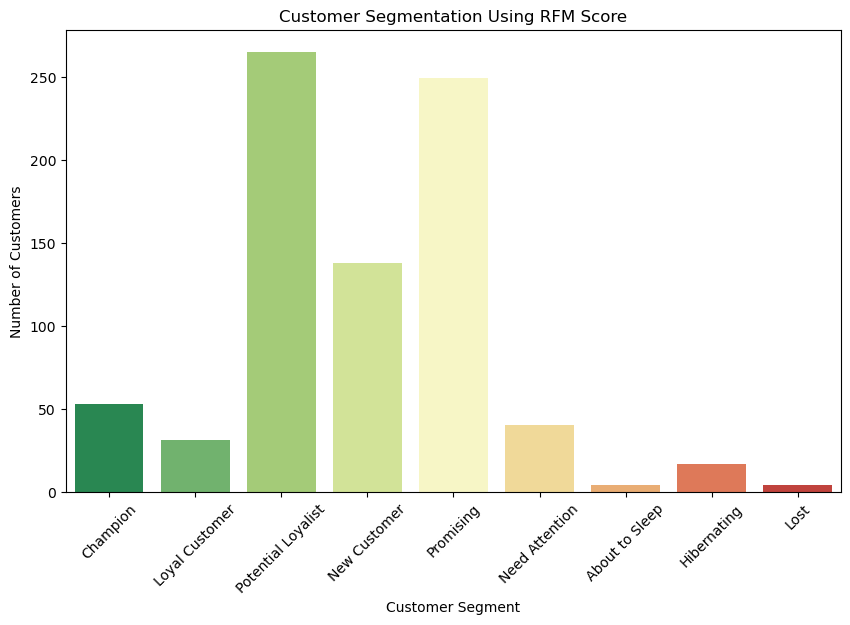

In [69]:
# Visualize distribution of customer segments
plt.figure(figsize=(10,6))
order = ['Champion', 'Loyal Customer', 'Potential Loyalist', 'New Customer', 'Promising', 'Need Attention', 'About to Sleep', 'Hibernating', 'Lost']
sns.countplot(data=rfm, x='Customer Segment', order=order, hue='Customer Segment', hue_order=order, palette="RdYlGn_r")
plt.title('Customer Segmentation Using RFM Score')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.savefig('Customer Segmentation.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

In [70]:
# Save the rfm dataframe as a csv file
rfm.to_csv('RFM Scores.csv')

### Further insights can be generated using the customer segmentation done through RFM analysis (few examples given)

In [71]:
# First, add the customer segment to sales_df
sales_rfm = sales_df.join(rfm[['Customer Segment']], on = 'Customer ID')
sales_rfm.head()

,Order ID,Product ID,Location ID,Customer ID,Purchase Date,Quantity,Price,Total Amount,Product Name,Cost,City,County,State,Total Cost,Customer Segment
0,AX10001,ENX2071,A152,C1499,2018-11-23,1,136,136,Product 72,72,San Bernardino,San Bernardino County,California,72,Promising
1,AX10002,ENX2053,A139,C1359,2018-11-13,1,596,596,Product 54,358,Ontario,San Bernardino County,California,358,Hibernating
2,AX10005,ENX2030,A121,C1220,2018-05-21,1,1899,1899,Product 31,1044,Fresno,Fresno County,California,1044,Promising
3,AX10007,ENX2001,A122,C1368,2018-12-19,4,951,3804,Product 2,504,Fullerton,Orange County,California,2016,Need Attention
4,AX10009,ENX2082,A101,C1764,2018-07-03,1,1103,1103,Product 83,838,Antioch,Contra Costa County,California,838,Potential Loyalist


In [72]:
sales_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9889 entries, 0 to 9888
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          9889 non-null   object        
 1   Product ID        9889 non-null   object        
 2   Location ID       9889 non-null   object        
 3   Customer ID       9889 non-null   object        
 4   Purchase Date     9889 non-null   datetime64[ns]
 5   Quantity          9889 non-null   int64         
 6   Price             9889 non-null   int64         
 7   Total Amount      9889 non-null   int64         
 8   Product Name      9889 non-null   object        
 9   Cost              9889 non-null   int64         
 10  City              9889 non-null   object        
 11  County            9889 non-null   object        
 12  State             9889 non-null   object        
 13  Total Cost        9889 non-null   int64         
 14  Customer Segment  9889 n

In [73]:
# Save the sales_rfm dataframe as a csv file
sales_rfm.to_csv('RFM Analysis Result.csv')

In [74]:
# Calculate Gross Margin % for each customer segment (the assumption is cost of labour is factored into the cost for each product)
sales_rfm_gm = sales_rfm.groupby('Customer Segment').aggregate({'Total Amount':'sum', 'Total Cost':'sum'})
sales_rfm_gm['Gross Margin %'] = round(((sales_rfm_gm['Total Amount'] - sales_rfm_gm['Total Cost'])/sales_rfm_gm['Total Amount'])*100,2)
sales_rfm_gm

,Total Amount,Total Cost,Gross Margin %
Customer Segment,,,
About to Sleep,79283,52917,33.26
Champion,2684535,1809733,32.59
Hibernating,396454,269310,32.07
Lost,66498,45013,32.31
Loyal Customer,1186371,803229,32.30
Need Attention,1803965,1215719,32.61
New Customer,2503835,1701811,32.03
Potential Loyalist,8283084,5591155,32.50
Promising,6252283,4205336,32.74


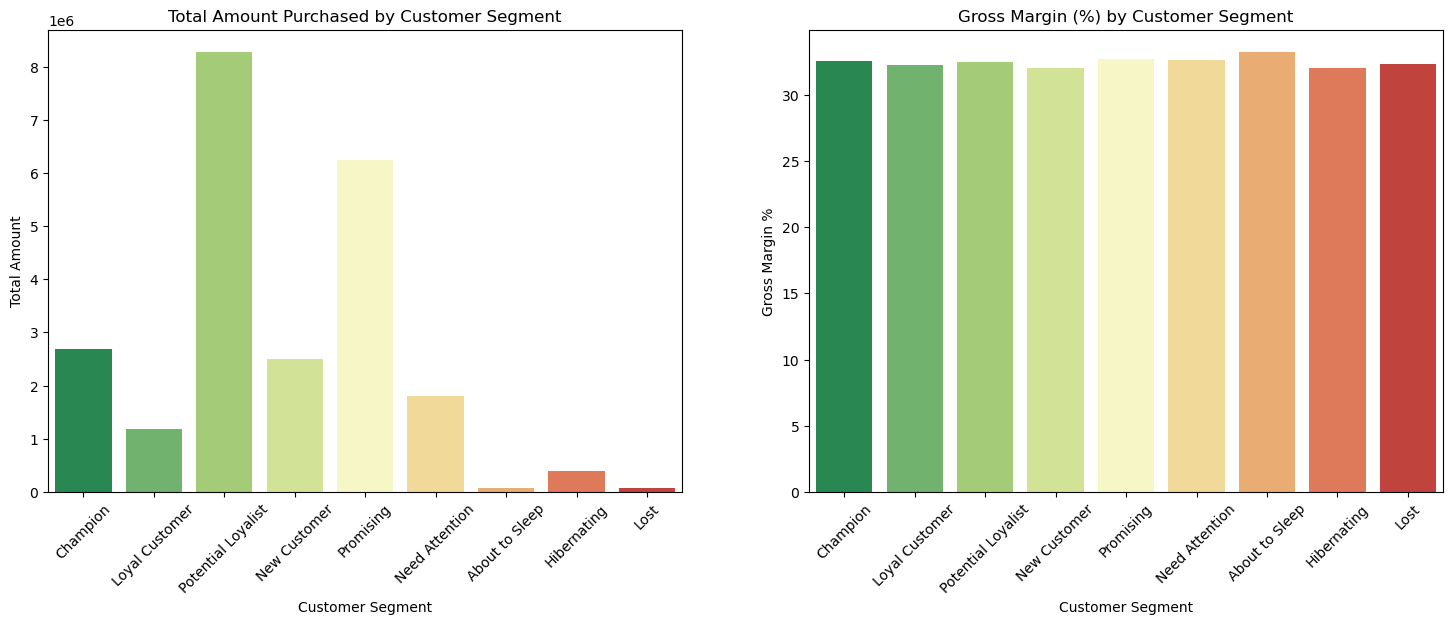

In [75]:
# Visualize total amount and gross margin by customer segment
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
order = ['Champion', 'Loyal Customer', 'Potential Loyalist', 'New Customer', 'Promising', 'Need Attention', 'About to Sleep', 'Hibernating', 'Lost']
ax1.set_title('Total Amount Purchased by Customer Segment')
sns.barplot(data=sales_rfm_gm, x='Customer Segment', y='Total Amount', order=order, hue='Customer Segment', hue_order=order, palette="RdYlGn_r", ax=ax1)
ax2.set_title('Gross Margin (%) by Customer Segment')
sns.barplot(data=sales_rfm_gm, x='Customer Segment', y='Gross Margin %', order=order, hue='Customer Segment', hue_order=order, palette="RdYlGn_r", ax=ax2)

ax1.tick_params('x', rotation=45)
ax2.tick_params('x', rotation=45)

plt.show()

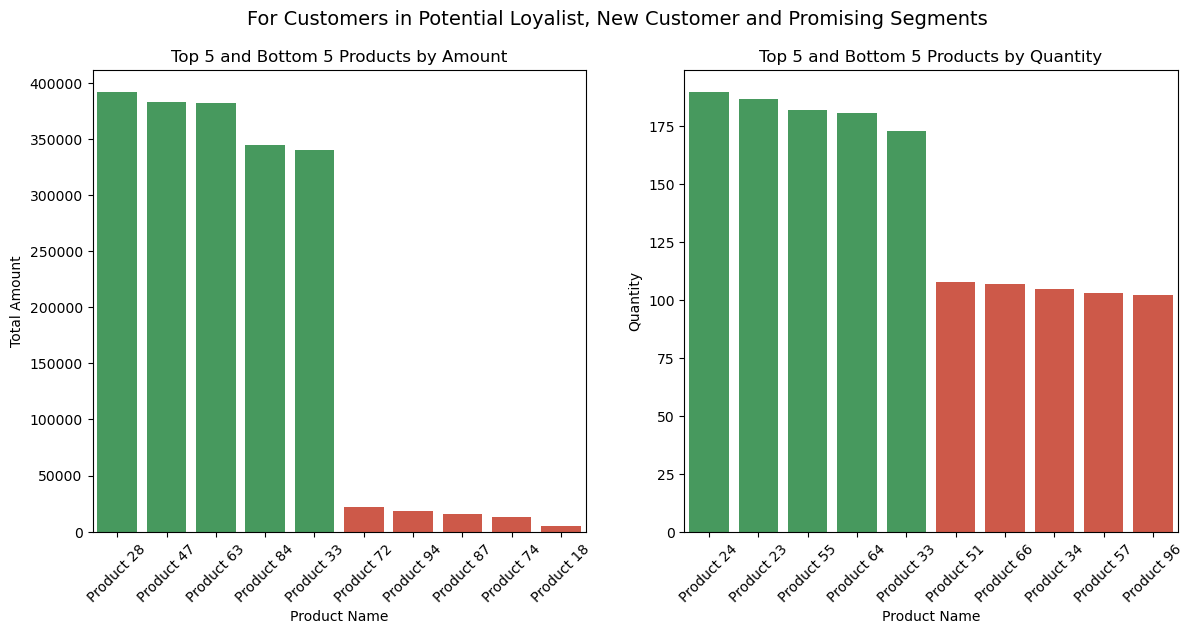

In [76]:
# Potential Loyalist, New Customer and Promising segments account for the most number of customers
# What are the top 5 and bottom 5 performing products by amount and quantity in these three customer segments combined?
sales_top3seg = sales_rfm[sales_rfm['Customer Segment'].isin(['Potential Loyalist', 'New Customer', 'Promising'])]

pdt_amt = sales_top3seg[['Product Name', 'Total Amount']].groupby('Product Name').sum().sort_values('Total Amount', ascending = False)
pdt_qty = sales_top3seg[['Product Name', 'Quantity']].groupby('Product Name').sum().sort_values('Quantity', ascending = False)

req = [0, 1, 2, 3, 4, -5, -4, -3, -2, -1]
cols1 = ['#e34933' if x < pdt_amt['Total Amount'].mean() else '#39a758' for x in pdt_amt.iloc[req]['Total Amount']]
cols2 = ['#e34933' if x < pdt_qty['Quantity'].mean() else '#39a758' for x in pdt_qty.iloc[req]['Quantity']]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax1.set_title('Top 5 and Bottom 5 Products by Amount')
sns.barplot(data=pdt_amt.iloc[req], x='Product Name', y='Total Amount', hue='Product Name', palette=cols1, ax=ax1)
ax2.set_title('Top 5 and Bottom 5 Products by Quantity')
sns.barplot(data=pdt_qty.iloc[req], x='Product Name', y='Quantity', hue='Product Name', palette=cols2, ax=ax2)
ax1.tick_params('x', rotation=45)
ax2.tick_params('x', rotation=45)

fig.suptitle('For Customers in Potential Loyalist, New Customer and Promising Segments', fontsize=14)

plt.show()

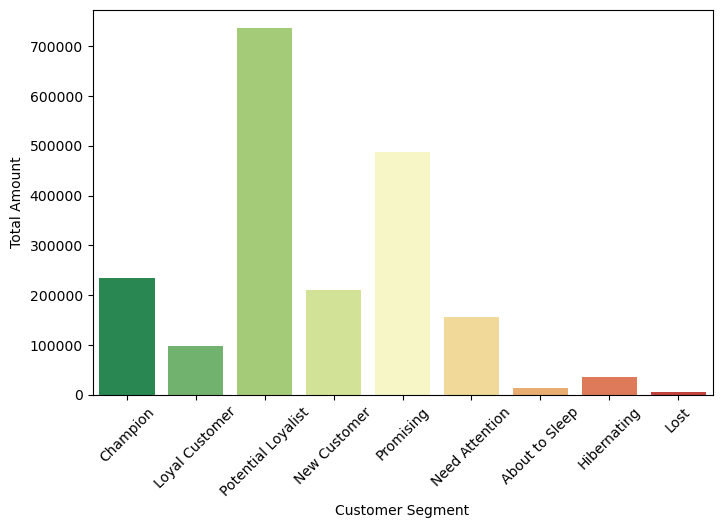

In [77]:
# What about the total amount by customer segment in the top 5 cities by total amount purchased?
plt.figure(figsize=(8,5))
sales_top5 = sales_rfm[sales_rfm['City'].isin(['Roseville', 'Rialto', 'Fontana', 'Escondido', 'Victorville'])].groupby('Customer Segment')[['Total Amount']].sum()
sns.barplot(data=sales_top5, x='Customer Segment', y='Total Amount', order=order, hue='Customer Segment', hue_order=order, palette="RdYlGn_r")

plt.xticks(rotation=45)

plt.show()

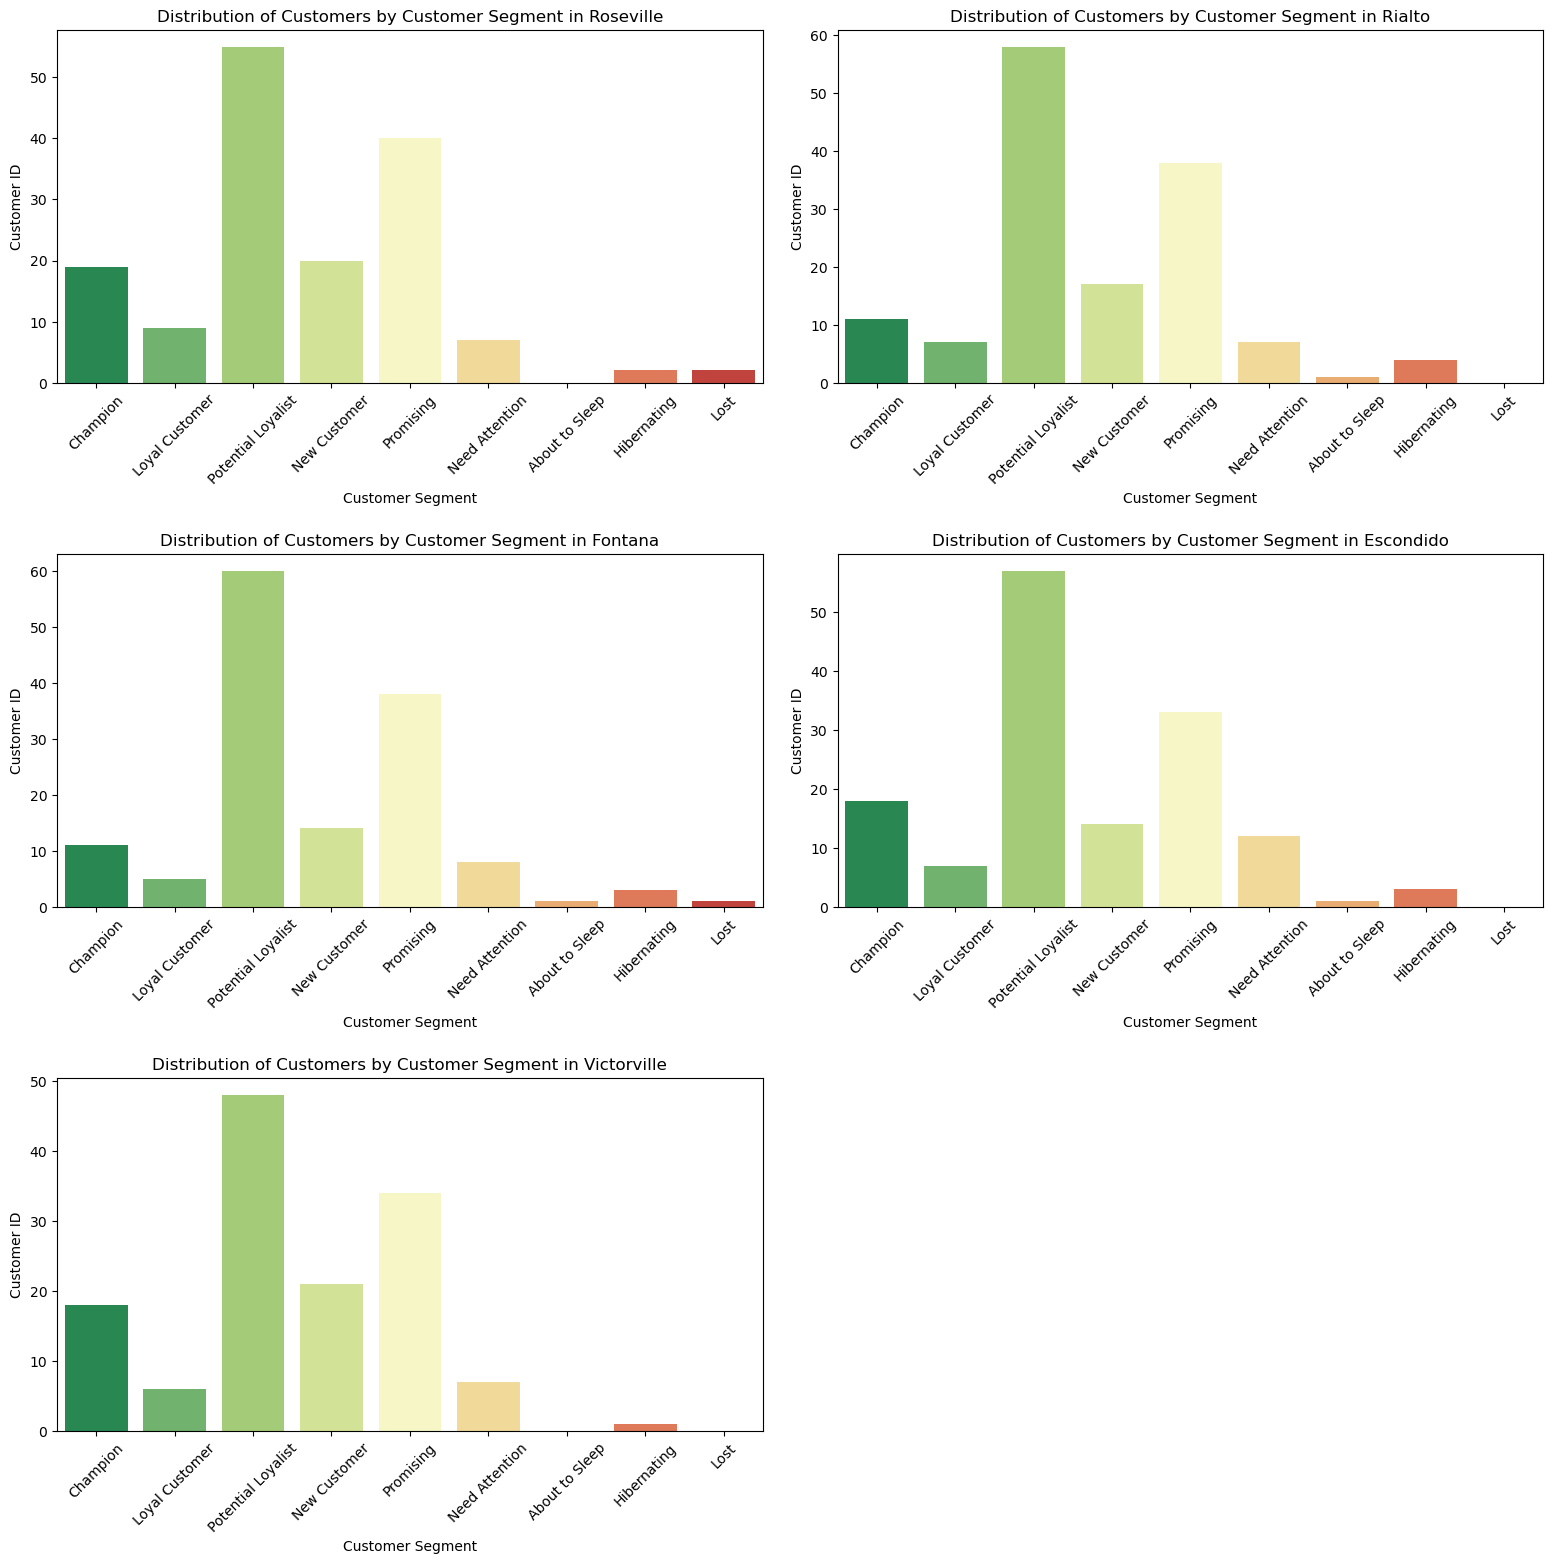

In [78]:
# Also, distribution of customers by customer segment IN EACH of the top 5 cities by total amount purchased
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))
location = ['Roseville', 'Rialto', 'Fontana', 'Escondido', 'Victorville']

for city, axis in zip(location, axes.flatten()):
    salesi = sales_rfm[sales_rfm['City'] ==city].groupby(['City', 'Customer Segment'])['Customer ID'].nunique().reset_index()
    sns.barplot(x=salesi['Customer Segment'], y=salesi['Customer ID'], order=order, hue=salesi['Customer Segment'], hue_order=order, palette="RdYlGn_r", ax=axis)
    axis.tick_params('x', rotation=45)
    axis.set_title(f"Distribution of Customers by Customer Segment in {city}")
    plt.tight_layout(pad=2)

axes[2, 1].remove()

plt.show()